### Data Description
Pulse Transit Time PPG Dataset  
(https://www.physionet.org/content/pulse-transit-time-ppg/1.1.0/#files)  

다중 센서를 통한 PPG, ECG 등 데이터를 포함.  
22명의 피실험자 대상으로 3가지 활동을 수행하도록 함. (sit, walk, run)


In [281]:
import pandas as pd

ppg = pd.read_csv('./dataset/s9_sit.csv')
ppg

,time,ecg,peaks,pleth_1,pleth_2,pleth_3,pleth_4,pleth_5,pleth_6,lc_1,lc_2,temp_1,temp_2,temp_3,a_x,a_y,a_z,g_x,g_y,g_z
0,2021-01-01 11:53:53.793086,30259,0,67562,81029,4548,72704,100328,4386,6490394,6484197,28.38,31.25,30.270075,5.387827,2.786394,-7.666026,-0.031880,-0.003963,-0.008745
1,2021-01-01 11:53:53.795086,29614,0,67562,81029,4548,72704,100328,4386,6488845,6484192,28.38,31.25,30.264084,5.392017,2.787591,-7.667822,-0.030016,-0.004495,-0.008478
2,2021-01-01 11:53:53.797086,29126,0,67572,81036,4544,72701,100333,4390,6488845,6484192,28.38,31.25,30.264084,5.377651,2.780408,-7.661237,-0.027486,-0.004629,-0.008079
3,2021-01-01 11:53:53.799086,28984,0,67580,81030,4546,72714,100339,4386,6488845,6484192,28.38,31.25,30.261089,5.365679,2.782204,-7.654054,-0.025754,-0.004629,-0.007813
4,2021-01-01 11:53:53.801086,29217,0,67576,81015,4547,72715,100331,4392,6488845,6484192,28.38,31.25,30.261089,5.360292,2.779211,-7.652857,-0.023224,-0.004762,-0.006880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243412,2021-01-01 12:02:00.617088,29653,0,67477,80152,4101,73240,99936,4274,6558846,6530600,28.50,31.38,30.434811,5.302828,2.111195,-7.917430,0.012196,0.003095,0.016955
243413,2021-01-01 12:02:00.619088,29493,0,67474,80158,4112,73234,99927,4279,6558846,6530600,28.50,31.38,30.443794,5.308814,2.109998,-7.909050,0.012329,0.002695,0.017088
243414,2021-01-01 12:02:00.621088,29494,0,67478,80155,4108,73230,99944,4277,6560521,6531056,28.50,31.38,30.449787,5.304026,2.106406,-7.897677,0.012995,0.003095,0.017222
243415,2021-01-01 12:02:00.623088,29588,0,67472,80159,4107,73237,99948,4283,6560521,6531056,28.50,31.38,30.452782,5.305821,2.102815,-7.894085,0.013927,0.003627,0.017222


데이터 일부를 취해 heartpy 분석이 가능한지 테스트

In [282]:
import heartpy as hp
import matplotlib.pyplot as plt

sample_rate = 500

data = (ppg.iloc[0:12000, [1]]).to_numpy().flatten()
data

array([30259, 29614, 29126, ..., 33360, 33208, 33080])

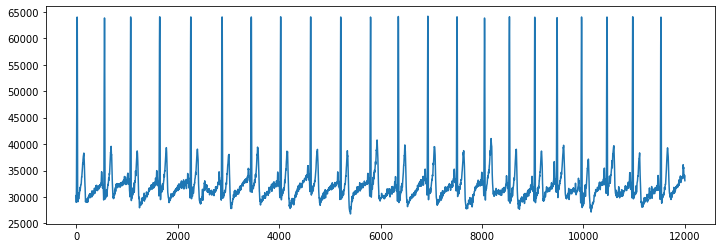

In [283]:
plt.figure(figsize=(12,4))
plt.plot(data)
plt.show()

In [284]:
import matplotlib.pyplot as plt
import numpy as np

In [285]:
wd, m = hp.process(data, sample_rate)

# plt.figure(figsize=(12, 4))
# hp.plotter(wd, m)

for measure in m.keys():
    print('%s: %f' %(measure, m[measure]))

bpm: 54.699608
ibi: 1096.900000
sdnn: 95.086224
sdsd: 40.384029
rmssd: 68.106727
pnn20: 0.631579
pnn50: 0.526316
hr_mad: 57.000000
sd1: 48.071161
sd2: 128.420578
s: 19394.076694
sd1/sd2: 0.374326
breathingrate: 0.182332


# 데이터 전처리  
파형 특성을 담은 dataframe 만들기

In [286]:
feature_df = pd.DataFrame(columns=['subject', 'bpm', 'ibi', 'sdnn', 'sdsd', 'rmssd', 'pnn20', 'pnn50', 'hr_mad', 'sd1', 'sd2', 's', 'sd1/sd2', 'breathingrate'])
feature_df

,subject,bpm,ibi,sdnn,sdsd,rmssd,pnn20,pnn50,hr_mad,sd1,sd2,s,sd1/sd2,breathingrate


각 피실험자의 데이터를 분할해 heartpy로 분석하고 dataframe에 파형의 특성들을 담기  
해당 과정을 반복

In [287]:
# def analyze_hp(start):
start_subject_idx = 0
for subject_num in range(start_subject_idx, start_subject_idx+10):
    ppg = pd.read_csv('./dataset/s' + str(subject_num+1) + '_sit.csv')
    for i in range(20): # 24초 * 20 == 480초
        start_idx = i * 12000
        data = (ppg.iloc[start_idx:start_idx+12000, [1]]).to_numpy().flatten()
        new_features_list = []

        wd, m = hp.process(data, sample_rate)

        new_features_list.append(subject_num)
        for measure in m.keys():
            # print('%s: %f' %(measure, m[measure]))
            new_features_list.append(m[measure])
        
        feature_df.loc[len(feature_df)] = new_features_list

feature_df.to_csv('./dataset/processed/feature_data.csv', encoding='utf-8', mode='w', index=False)
feature_df

/Users/hoho/hoho_dir/Development/github/Multi-Modality-Person-Recognition/venv/lib/python3.8/site-packages/scipy/interpolate/_fitpack2.py:280: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)
/Users/hoho/hoho_dir/Development/github/Multi-Modality-Person-Recognition/venv/lib/python3.8/site-packages/scipy/interpolate/_fitpack2.py:280: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)
/Users/hoho/hoho_dir/Development/github/Multi-Modality-Person-

,subject,bpm,ibi,sdnn,sdsd,rmssd,pnn20,pnn50,hr_mad,sd1,sd2,s,sd1/sd2,breathingrate
0,0.0,75.097108,798.965517,37.650372,18.155086,32.952347,0.607143,0.142857,30.0,23.299459,48.468036,3547.734683,0.480718,0.258956
1,0.0,73.285640,818.714286,31.992027,11.805000,28.352281,0.592593,0.000000,19.0,20.030566,41.247289,2595.604452,0.485621,0.130867
2,0.0,74.666667,803.571429,21.443328,12.464270,24.899799,0.444444,0.037037,15.0,17.602999,24.513819,1355.649756,0.718085,0.266667
3,0.0,78.104660,768.200000,38.923343,15.936258,26.334716,0.448276,0.068966,27.0,18.621201,51.923661,3037.545949,0.358626,0.216957
4,0.0,72.345190,829.357143,36.578892,17.345991,32.874622,0.666667,0.037037,26.0,23.245337,46.951745,3428.762906,0.495090,0.086125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,9.0,70.545201,850.518519,23.129859,12.733964,27.168987,0.538462,0.076923,16.0,19.200284,25.326507,1527.681466,0.758110,0.348371
196,9.0,74.690934,803.310345,42.802758,14.312118,22.884805,0.392857,0.000000,34.0,15.914632,57.309845,2865.337002,0.277695,0.128777
197,9.0,75.226978,797.586207,30.833834,16.073175,27.825990,0.464286,0.071429,22.0,19.591752,38.447951,2366.444563,0.509566,0.086468
198,9.0,72.059707,832.642857,19.993239,9.599383,19.813949,0.333333,0.000000,13.0,14.007053,22.607888,994.847777,0.619565,0.343141


In [288]:
# pd.set_option('display.max_rows', 500)
# test = feature_df[train_columns]
# test['sdsd'].str.contains('--')
# pd.set_option('display.max_rows', 10)

In [289]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, RobustScaler

feature_df = pd.read_csv('./dataset/processed/feature_data.csv')

# features
train_columns = ['bpm', 'ibi', 'sdnn', 'sdsd', 'rmssd', 'pnn20', 'pnn50', 'hr_mad', 'sd1', 'sd2', 's', 'sd1/sd2', 'breathingrate']

# 비정상 값 처리
feature_df[train_columns] = feature_df[train_columns].replace('--', 0.0)

# 결측치 처리
feature_df[train_columns] = feature_df[train_columns].interpolate(method='linear', limit_direction='forward')
# feature_df[train_columns] = feature_df[train_columns].fillna(method='bfill')

# Scale X value
# scaler = StandardScaler()
# scaler = MinMaxScaler()
scaler = RobustScaler()
scaler.fit(feature_df[train_columns])
feature_scaled_X = scaler.transform(feature_df[train_columns])
feature_scaled_X_df = pd.DataFrame(feature_scaled_X, columns=train_columns)

# (y value type) float to int
feature_df['subject'] = feature_df['subject'].astype(int)

# train / test 데이터셋 분할
X_train, X_test, y_train, y_test = train_test_split(feature_scaled_X_df, feature_df['subject'],
                                                    test_size = 0.1, random_state = 32)

# normalize y value
le = LabelEncoder()
y_train = le.fit_transform(y_train, )

X_train

,bpm,ibi,sdnn,sdsd,rmssd,pnn20,pnn50,hr_mad,sd1,sd2,s,sd1/sd2,breathingrate
26,4.046572,-2.573061,-1.277044,-1.616855,-1.275459,-1.926753,-0.433582,-1.090909,-1.278498,-1.192909,-0.924086,-0.855810,-0.355912
46,-0.421683,0.458361,0.291559,0.601413,0.437746,0.508860,0.694843,0.519481,0.438951,0.398093,0.425379,0.258330,0.372510
21,4.198702,-2.632594,-1.130542,-1.534983,-1.241908,-1.926753,-0.433582,-1.038961,-1.245780,-1.016812,-0.908145,-0.922241,-0.677703
160,-1.905995,2.710708,1.996455,2.155097,1.699035,0.425914,1.772362,1.506494,1.706009,2.599093,3.873957,-0.067453,0.071964
44,-0.112793,0.116863,0.481774,-0.074171,0.120530,0.467926,0.015485,0.623377,0.124335,0.668292,0.344409,-0.193027,0.668741
...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,-0.198885,0.208791,-0.072808,-0.094065,-0.160113,-0.330300,-0.134204,-0.103896,-0.158282,0.145441,-0.132630,-0.122548,-0.353458
124,-1.050950,1.269197,-0.107572,1.006356,1.035707,1.022249,1.138153,0.103896,1.044843,-0.233750,0.305909,1.825880,0.993969
54,0.363800,-0.351610,0.097369,0.074337,0.023468,-0.385351,0.144527,0.779221,0.026933,0.346018,0.092977,-0.082226,0.742202
133,-0.954397,1.133288,-0.498651,0.473398,0.487624,0.711828,0.788879,-0.519481,0.493752,-0.604336,-0.233083,2.012093,1.033884


In [290]:
from xgboost import XGBClassifier

model = XGBClassifier(n_estimators=300,
                      learning_rate=0.1, 
                      max_depth=10, 
                      random_state=32, 
                      objective='multi:softprob')
model.fit(X_train, y_train) # 모델 학습

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=10, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=300,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=32, reg_alpha=0, ...)

In [291]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
y_pred = y_pred + start_subject_idx

accuracy_score(y_pred, y_test)

0.6

feature의 중요도를 평가

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

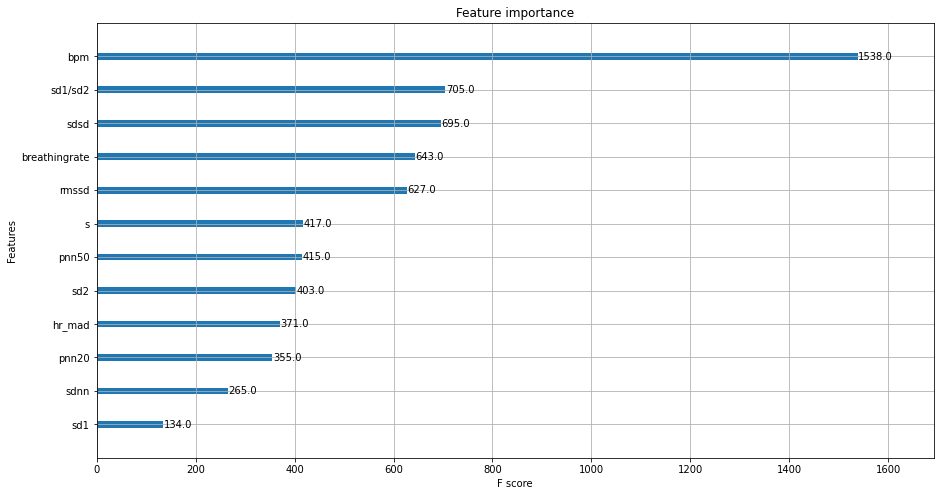

In [292]:
from xgboost import plot_importance

fig, ax = plt.subplots(figsize=(15, 8))
plot_importance(model, ax=ax)

plot_tree 시각화

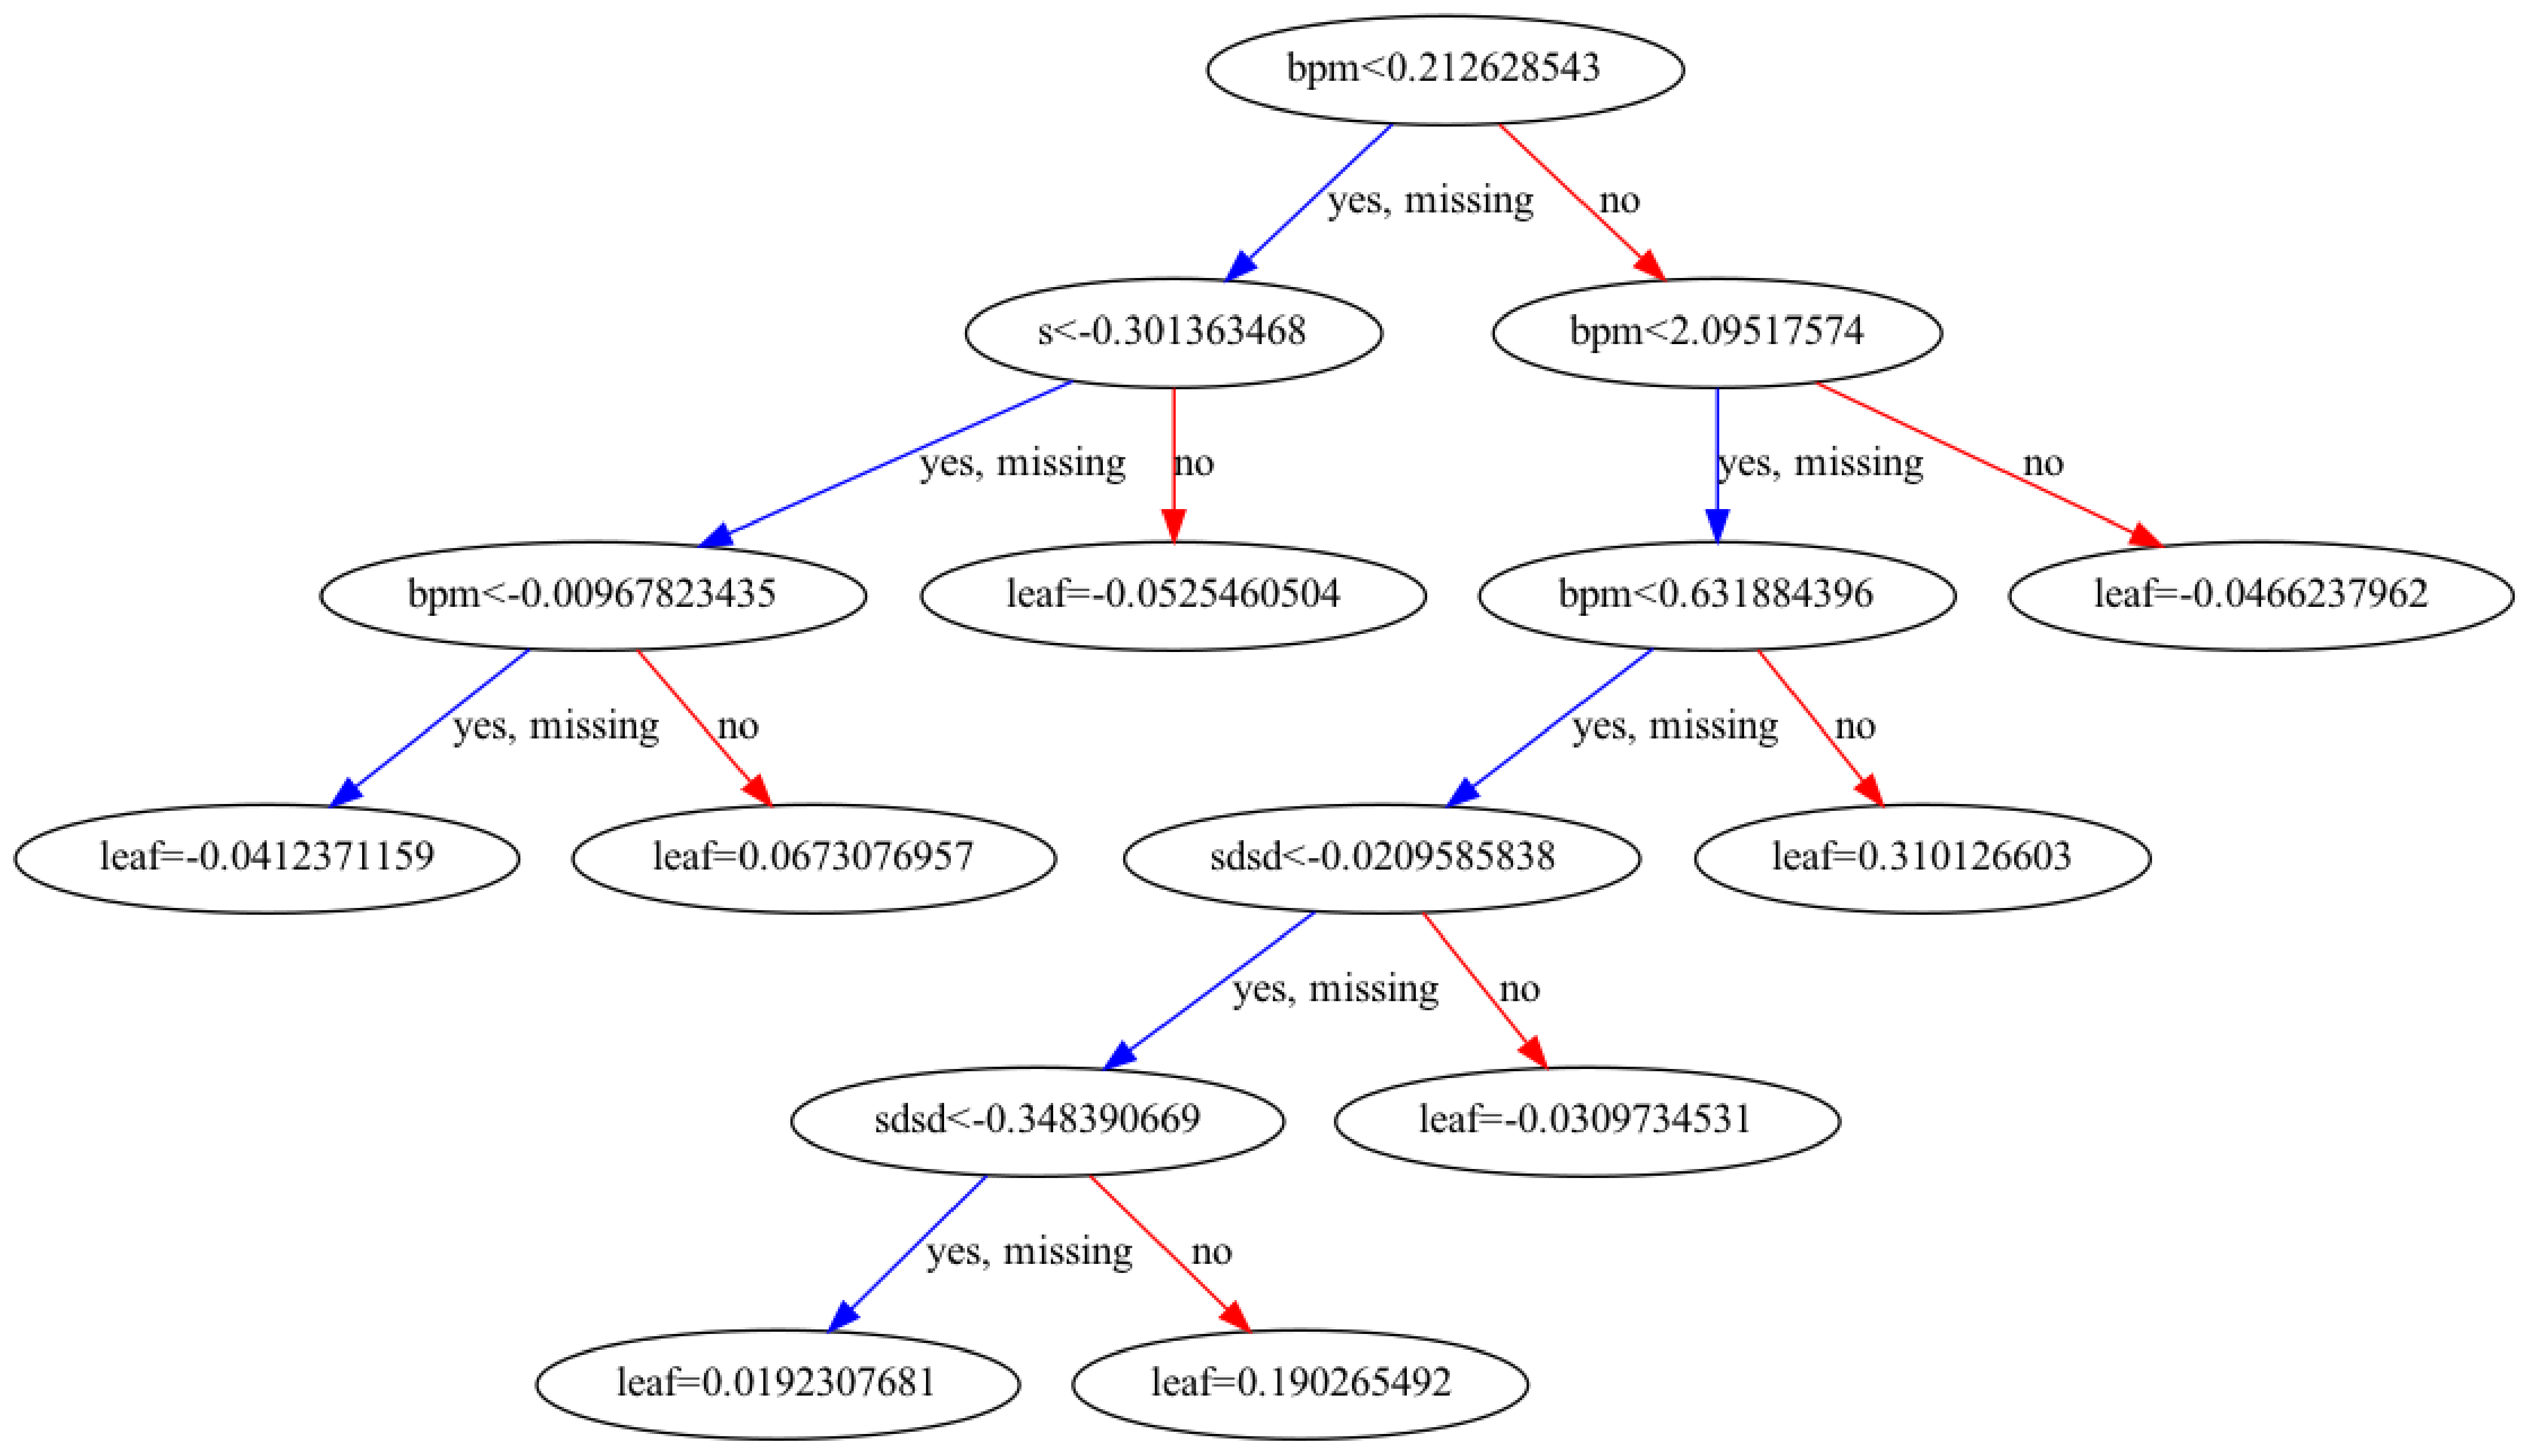

In [293]:
from xgboost import plot_tree
from matplotlib.pylab import rcParams

rcParams['figure.figsize'] = 80, 80
plot_tree(model, num_trees=3)
plt.show()